# Load Images

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
t_img = cv2.imread('/mnt/d/Research/perceptual-reflection-removal/dataset/reflection_layer/2.jpg',-1)
r_img = cv2.imread('/mnt/d/Research/perceptual-reflection-removal/dataset/transmission_layer/2.jpg',-1)
# r_img = cv2.imread('/mnt/d/Research/perceptual-reflection-removal/dataset/reflection_layer/2.jpg',-1)
# t_img = cv2.imread('/mnt/d/Research/perceptual-reflection-removal/dataset/transmission_layer/2.jpg',-1)
t_img = cv2.cvtColor(t_img, cv2.COLOR_BGR2RGB)
r_img = cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(t_img)


In [ ]:
plt.imshow(r_img)


In [ ]:
neww=np.random.randint(256, 480)
newh=round((neww/t_img.shape[1])*t_img.shape[0])
print(neww,newh)

In [ ]:
output_image_t=cv2.resize(np.float32(t_img),(neww,newh),cv2.INTER_CUBIC)/255.0
plt.imshow(output_image_t)


In [ ]:
output_image_r=cv2.resize(np.float32(r_img),(neww,newh),cv2.INTER_CUBIC)/255.0
plt.imshow(output_image_r)


# Down the brightness

In [ ]:
np.mean(output_image_t)*1/2 > np.mean(output_image_r)

In [ ]:
np.mean(output_image_t)*1/2

In [ ]:
np.mean(output_image_r)

In [ ]:
t=np.power(output_image_t,2.2)
r=np.power(output_image_r,2.2)


In [ ]:
plt.imshow(t)


In [ ]:
plt.imshow(r)


In [ ]:
t = np.clip(t*0.2, 0, 1)
# r = np.clip(r*1.5, 0, 1)

In [ ]:
plt.imshow(t)

In [ ]:
plt.imshow(r)

# Blur Image

In [ ]:
k_sz=np.linspace(1,5,80)
print("k_sz",k_sz)
sigma=k_sz[np.random.randint(0, len(k_sz))]
print("sigma",sigma)

In [ ]:
sz=int(2*np.ceil(2*sigma)+1)
print(sz)

In [ ]:
r_blur=cv2.GaussianBlur(r,(sz,sz),sigma,sigma,0)
plt.imshow(r_blur)


In [ ]:
blend=r_blur+t
plt.imshow(blend)


In [ ]:
att=1.08+np.random.random()/10.0
print(att)

In [ ]:
for i in range(3):
    maski=blend[:,:,i]>1
    mean_i=max(1.,np.sum(blend[:,:,i]*maski)/(maski.sum()+1e-6))
    r_blur[:,:,i]=r_blur[:,:,i]-(mean_i-1)*att
plt.imshow(r_blur)


In [ ]:
h,w=r_blur.shape[0:2]
print(h,w)
nneww=np.random.randint(0, 560-w-10)
nnewh=np.random.randint(0, 560-h-10)
print(nneww,nnewh)

In [ ]:
import scipy.stats as st
def gkern(kernlen=100, nsig=1):
    """Returns a 2D Gaussian kernel array."""
    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    kernel = kernel/kernel.max()
    return kernel

# create a vignetting mask
g_mask=gkern(560,3)
plt.imshow(g_mask)
g_mask=np.dstack((g_mask,g_mask,g_mask))
plt.imshow(g_mask)


In [ ]:
alpha1=g_mask[nnewh:nnewh+h,nneww:nneww+w,:]
plt.imshow(alpha1)


In [ ]:
alpha2 = 1-np.random.random()/5.0;
print(alpha2)


In [ ]:
r_blur_mask=np.multiply(r_blur,alpha1)
plt.imshow(r_blur_mask)

In [ ]:
blend=r_blur_mask+t*alpha2
plt.imshow(blend)

In [ ]:
t=np.power(t,1/2.2)
plt.imshow(t)

In [ ]:
r_blur_mask=np.power(r_blur_mask,1/2.2)
plt.imshow(r_blur_mask)

In [ ]:
blend=np.power(blend,1/2.2)
plt.imshow(blend)

In [ ]:
blend[blend>=1]=1
plt.imshow(blend)

In [ ]:
blend[blend<=0]=0
plt.imshow(blend)

In [ ]:
blend=np.power(blend,1/2.2)
blend[blend>=1]=1
blend[blend<=0]=0

# Put it together

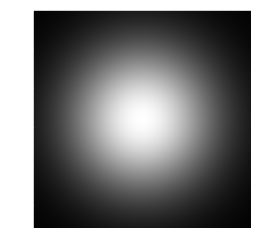

In [17]:
import scipy.stats as st
def gkern(kernlen=100, nsig=1):
    """Returns a 2D Gaussian kernel array."""
    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    kernel = kernel/kernel.max()
    return kernel

# create a vignetting mask
g_mask=gkern(560,3)
plt.imshow(g_mask)
g_mask=np.dstack((g_mask,g_mask,g_mask))
plt.imshow(g_mask)

def synthesis(t,r,sigma):
    t_init = t
    t=np.power(t,2.2)
    r=np.power(r,2.2)
    t = np.clip(t*0.2, 0, 1)
    # r = np.clip(r*1.5, 0, 1)
    print(1)
    show_image(t,r)
    sz=int(2*np.ceil(2*sigma)+1)
    r_blur=cv2.GaussianBlur(r,(sz,sz),sigma,sigma,0)
    blend=r_blur+t
    print("blend")
    show_image(blend,blend)
    att=1.08+np.random.random()/10.0

    for i in range(3):
        maski=blend[:,:,i]>1
        mean_i=max(1.,np.sum(blend[:,:,i]*maski)/(maski.sum()+1e-6))
        r_blur[:,:,i]=r_blur[:,:,i]-(mean_i-1)*att
    r_blur[r_blur>=1]=1
    r_blur[r_blur<=0]=0

    h,w=r_blur.shape[0:2]
    neww=np.random.randint(0, 560-w-10)
    newh=np.random.randint(0, 560-h-10)
    alpha1=g_mask[newh:newh+h,neww:neww+w,:]
    alpha2 = 1-np.random.random()/5.0;
    r_blur_mask=np.multiply(r_blur,alpha1)
    blend=r_blur_mask+t*alpha2

    t=np.power(t,1/2.2)
    r_blur_mask=np.power(r_blur_mask,1/2.2)
    blend=np.power(blend,1/2.2)
    blend[blend>=1]=1
    blend[blend<=0]=0
    final_result(t_init,r_blur,blend)

def show_image(t,r):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(t)
    axs[0].axis('off')
    axs[1].imshow(r)
    axs[1].axis('off')
    plt.tight_layout()
    plt.show()

def final_result(t,r,b):
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))
    axs[0].imshow(t)
    axs[0].axis('off')
    axs[1].imshow(r)
    axs[1].axis('off')
    axs[2].imshow(b)
    axs[2].axis('off')
    plt.tight_layout()
    plt.show()    

k_sz [1.         1.05063291 1.10126582 1.15189873 1.20253165 1.25316456
 1.30379747 1.35443038 1.40506329 1.4556962  1.50632911 1.55696203
 1.60759494 1.65822785 1.70886076 1.75949367 1.81012658 1.86075949
 1.91139241 1.96202532 2.01265823 2.06329114 2.11392405 2.16455696
 2.21518987 2.26582278 2.3164557  2.36708861 2.41772152 2.46835443
 2.51898734 2.56962025 2.62025316 2.67088608 2.72151899 2.7721519
 2.82278481 2.87341772 2.92405063 2.97468354 3.02531646 3.07594937
 3.12658228 3.17721519 3.2278481  3.27848101 3.32911392 3.37974684
 3.43037975 3.48101266 3.53164557 3.58227848 3.63291139 3.6835443
 3.73417722 3.78481013 3.83544304 3.88607595 3.93670886 3.98734177
 4.03797468 4.08860759 4.13924051 4.18987342 4.24050633 4.29113924
 4.34177215 4.39240506 4.44303797 4.49367089 4.5443038  4.59493671
 4.64556962 4.69620253 4.74683544 4.79746835 4.84810127 4.89873418
 4.94936709 5.        ]
sigma 1.2025316455696202
429 429


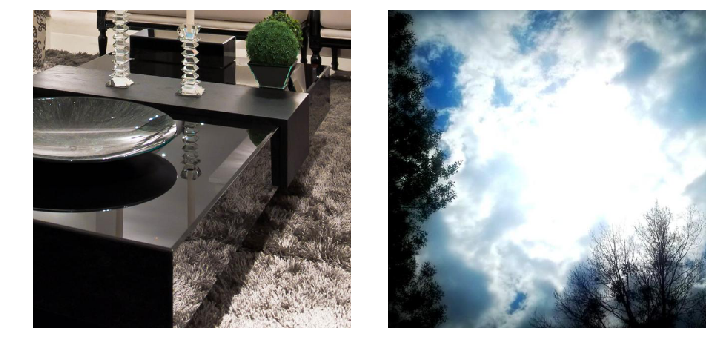

1


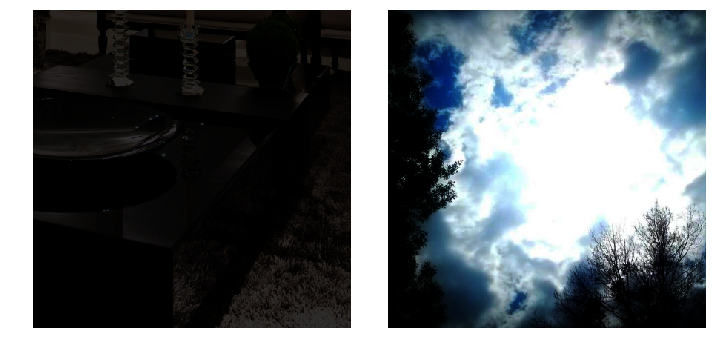

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


blend


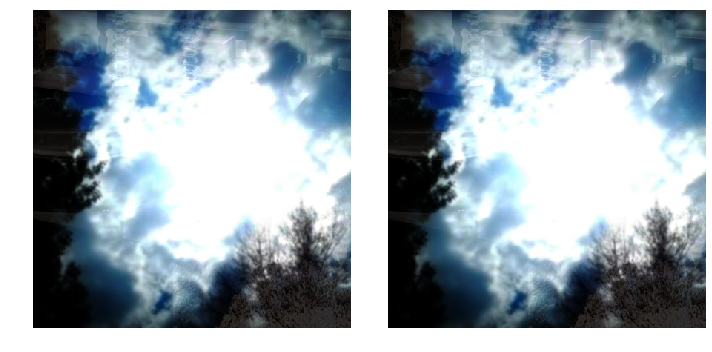

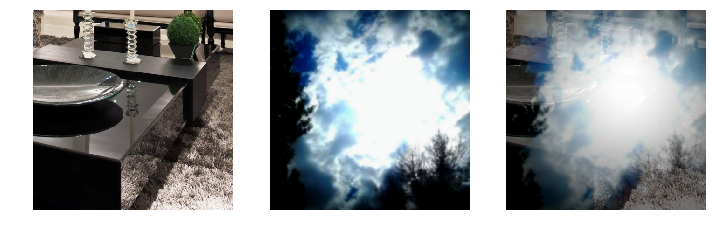

In [18]:
k_sz=np.linspace(1,5,80)
print("k_sz",k_sz)
sigma=k_sz[np.random.randint(0, len(k_sz))]
print("sigma",sigma)

t_img = cv2.imread('/mnt/d/Research/perceptual-reflection-removal/dataset/reflection_layer/2.jpg',-1)
r_img = cv2.imread('/mnt/d/Research/perceptual-reflection-removal/dataset/transmission_layer/2.jpg',-1)
# r_img = cv2.imread('/mnt/d/Research/perceptual-reflection-removal/dataset/reflection_layer/2.jpg',-1)
# t_img = cv2.imread('/mnt/d/Research/perceptual-reflection-removal/dataset/transmission_layer/2.jpg',-1)
t_img = cv2.cvtColor(t_img, cv2.COLOR_BGR2RGB)
r_img = cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB)

neww=np.random.randint(256, 480)
newh=round((neww/t_img.shape[1])*t_img.shape[0])
print(neww,newh)
output_image_t=cv2.resize(np.float32(t_img),(neww,newh),cv2.INTER_CUBIC)/255.0
output_image_r=cv2.resize(np.float32(r_img),(neww,newh),cv2.INTER_CUBIC)/255.0
show_image(output_image_t,output_image_r)

synthesis(output_image_t,output_image_r,sigma)